In [118]:
import pandas as pd
from pathlib import Path
import re
import matplotlib.pyplot as plt

# Construct the file path relative to the current script
np_camping_csv_file = Path("Resources/NPS_ONS_2022.csv")

# Read the CSV file and create a DataFrame
np_camping_df = pd.read_csv(np_camping_csv_file)

# Clean up the 'Total Overnight Stays' column
np_camping_df['Total Overnight Stays'] = np_camping_df['Total Overnight Stays'].str.replace(',', '', regex=True).astype(float)

# Clean up the 'Park Name' column
np_camping_df['Park Name'] = np_camping_df['Park Name'].str.replace(' NP', '', regex=True)

np_camping_df


,Park Name,Recreation Visit,Concessioner Lodging,Concessioner Camping,Tent Camping,RV Camping,Backcountry Camping,Total Overnight Stays
0,Acadia,"3,970,260",0,"1,884","136,183","49,647","1,472",189186.0
1,Arches,"1,460,652",0,0,"14,913","20,216",272,35401.0
2,Badlands,"1,006,809","10,375","14,929","2,710",590,"2,319",30923.0
3,Big Bend,"514,107","18,184","3,213","26,609","20,415","55,173",123594.0
4,Biscayne,"701,023",0,0,"2,267",0,0,2267.0
...,...,...,...,...,...,...,...,...
58,Wind Cave,"607,418",0,0,"4,865","5,528",435,10828.0
59,Wrangell-St. Elias,"65,236",0,0,0,0,195,195.0
60,Yellowstone,"3,290,242","492,529","439,752","10,909","18,454","34,758",996402.0
61,Yosemite,"3,667,550","644,508",0,"349,888","220,100","142,457",1356953.0


In [119]:
# Calculate total overnight stays for each park
total_stays_by_park = np_camping_df.groupby('Park Name')['Total Overnight Stays'].sum().reset_index()

# Sort the parks by total overnight stays in descending order
total_stays_by_park = total_stays_by_park.sort_values('Total Overnight Stays', ascending=False)

total_stays_by_park

,Park Name,Total Overnight Stays
61,Yosemite,1356953.0
22,Grand Canyon,1044074.0
60,Yellowstone,996402.0
23,Grand Teton,639327.0
26,Great Smoky Mountains,479065.0
...,...,...
59,Wrangell-St. Elias,195.0
9,Carlsbad Caverns,66.0
19,Gateway Arch,0.0
57,White Sands,0.0


In [120]:
# Export the Park Overnight Stays into a csv
total_stays_by_park.to_csv("output_data/NP Number of Camper.csv", index_label="National Park Number of Overnight Stays")

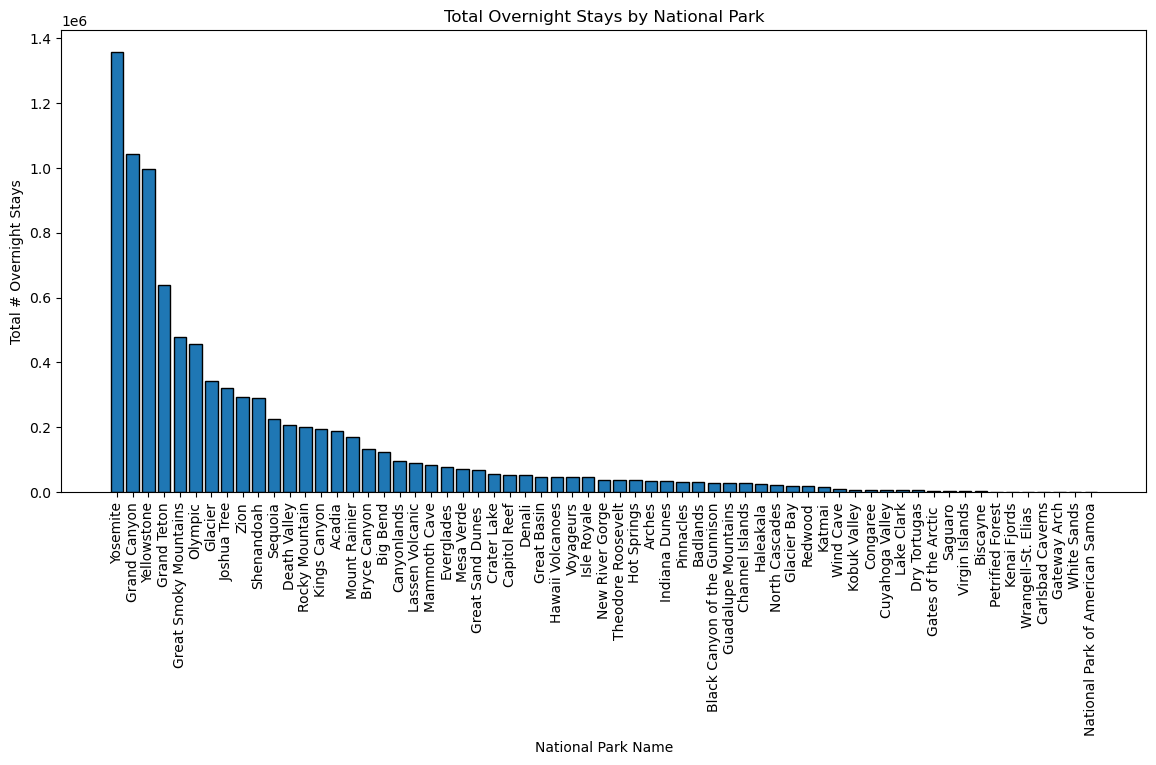

In [121]:
# Plot the bar chart
plt.figure(figsize=(14, 6))
bars = plt.bar(total_stays_by_park['Park Name'], total_stays_by_park['Total Overnight Stays'])
plt.xticks(rotation=90)
plt.xlabel('National Park Name')
plt.ylabel('Total # Overnight Stays')
plt.title('Total Overnight Stays by National Park')

# Add black edge lines to the bars
for bar in bars:
    bar.set_edgecolor('black')
    
# Save the figure
plt.savefig("Images/Total_Overnight_Stays_by_NP.png", bbox_inches='tight')

plt.show()

In [122]:
import pandas as pd
from pathlib import Path
import re
import matplotlib.pyplot as plt

# Construct the file path relative to the current script
np_size_csv_file = Path("Resources/NPS_Acreage_2022.csv")

# Read the CSV file and create a DataFrame
np_size_df = pd.read_csv(np_size_csv_file)

# Clean up the columns, drop columns don't need
np_size_df = np_size_df.drop(columns=[
        "Region", "State", "NPS Fee Acres", "NPS Less Than Fee Acres", "Other Public Acres", "Private Acres","Subtotal Non-Federal Acres", 
        "Other Federal Fee Acres", "Subtotal Federal Acres", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13"])

# Clean up the " NP" part of the Park Name
np_size_df['Park Name'] = np_size_df['Park Name'].str.replace(' NP', '', regex=True)

np_size_df

,Park Name,Gross Area Acres
0,Acadia,"49,071.40"
1,Arches,"76,678.98"
2,Badlands,"242,755.94"
3,Big Bend,"801,163.21"
4,Biscayne,"172,971.11"
...,...,...
58,Wind Cave,"33,970.84"
59,Wrangell-St. Elias,"8,323,146.48"
60,Yellowstone,"2,219,790.71"
61,Yosemite,"761,747.50"


In [123]:
# Remove non-numeric characters from 'Gross Area Acres' column
np_size_df['Gross Area Acres'] = np_size_df['Gross Area Acres'].str.replace(',', '').astype(float)

# Calculate total overnight stays for each park
total_size_by_park = np_size_df.groupby('Park Name')['Gross Area Acres'].sum().reset_index()

# Sort the parks by total overnight stays in descending order
total_size_by_park = total_size_by_park.sort_values('Gross Area Acres', ascending=False)

total_size_by_park

,Park Name,Gross Area Acres
59,Wrangell-St. Elias,8323146.48
18,Gates of the Arctic,7523897.45
15,Denali,4740911.16
34,Katmai,3674529.33
14,Death Valley,3408395.63
...,...,...
31,Indiana Dunes,15349.08
55,Virgin Islands,15052.33
43,National Park of American Samoa,8256.67
30,Hot Springs,5554.15


In [124]:
# Export the Park Acres into a csv
total_size_by_park.to_csv("output_data/Total Park Acres.csv", index_label="Total Park Acres")

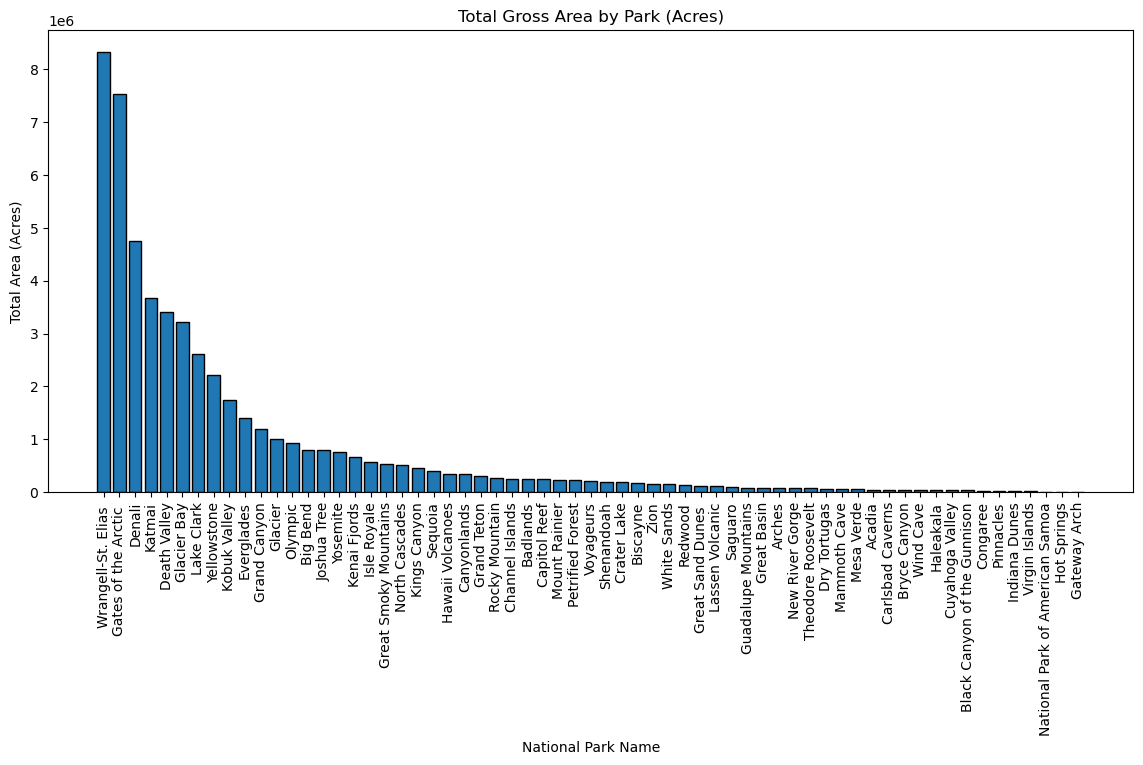

In [125]:
# Plot the bar chart
plt.figure(figsize=(14, 6))
bars = plt.bar(total_size_by_park['Park Name'], total_size_by_park['Gross Area Acres'])
plt.xticks(rotation=90)
plt.xlabel('National Park Name')
plt.ylabel('Total Area (Acres)')
plt.title('Total Gross Area by Park (Acres)')

# Add black edge lines to the bars
for bar in bars:
    bar.set_edgecolor('black')

# Save the figure
plt.savefig("Images/Total_Area_of_National_Park.png", bbox_inches='tight')

plt.show()

y = 0.00x + 140465.65


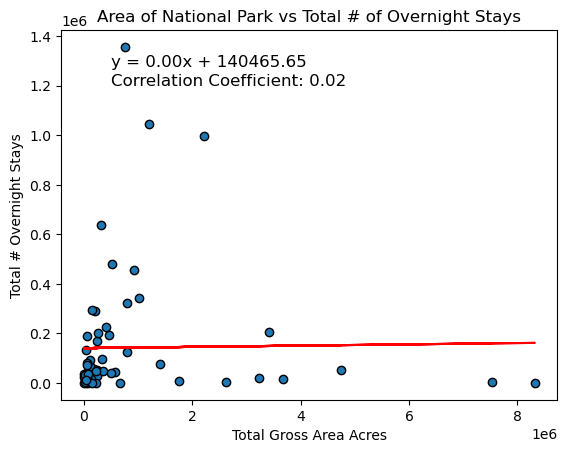

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Defining axes
x_values = np_size_df["Gross Area Acres"].astype(float)
y_values = np_camping_df["Total Overnight Stays"].astype(float)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values * slope + intercept)
line_eq = "y = {:.2f}x + {:.2f}".format(slope, intercept)
print(line_eq)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(x_values, y_values)[0, 1]

# Create plot
plt.scatter(x_values, y_values, edgecolors="black")
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation and correlation coefficient
plt.xlabel("Total Gross Area Acres")
plt.ylabel("Total # Overnight Stays")
plt.title("Area of National Park vs Total # of Overnight Stays")

# Add the line equation and correlation coefficient to the plot
plt.text(0.1, 0.9, line_eq, transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.85, "Correlation Coefficient: {:.2f}".format(correlation_coefficient),
         transform=plt.gca().transAxes, fontsize=12)

# Save the figure
plt.savefig("Images/Area of NP vs Total # of Overnight Stays.png")

# Show plot
plt.show()


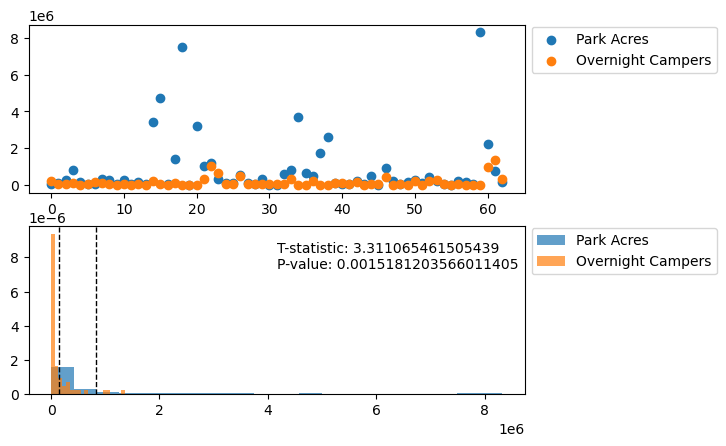

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Extract values from the DataFrames
Value1 = np_size_df["Gross Area Acres"].astype(float)
Value2 = np_camping_df["Total Overnight Stays"].astype(float)

# Generate fake data for comparison
park_acres = np_size_df["Gross Area Acres"] + np.random.normal(scale=10, size=len(np_size_df))
overnight_campers = np_camping_df["Total Overnight Stays"] + np.random.normal(scale=10, size=len(np_camping_df))

# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(park_acres)), park_acres, label="Park Acres")
plt.scatter(range(len(overnight_campers)), overnight_campers, label="Overnight Campers")
plt.legend(loc="center left", bbox_to_anchor=(1, .85))

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(park_acres, 20, density=True, alpha=0.7, label="Park Acres")
plt.hist(overnight_campers, 20, density=True, alpha=0.7, label="Overnight Campers")
plt.axvline(park_acres.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(overnight_campers.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.85))

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(park_acres, overnight_campers, equal_var=False)

# Print the t-statistic and p-value on the chart
plt.text(0.5, 0.75, f"T-statistic: {t_statistic}\nP-value: {p_value}", transform=plt.gca().transAxes)

plt.savefig("Images/t-test and P-value.png", bbox_inches='tight')

plt.show()


In [128]:
import requests
import json
from config import api_key
import pandas as pd
from pathlib import Path
from pandas import json_normalize

# Construct the file path relative to the current script
np_camping_csv_file = Path("Resources/NPS_ONS_2022.csv")

# Read the CSV file and create a DataFrame
np_camping_data = pd.read_csv(np_camping_csv_file)

# Clean up the " NP" part of the Park Name
np_camping_df = pd.DataFrame(np_camping_data)

# Establish nps endpoint - with api key
endpoint = f"https://developer.nps.gov/api/v1/parks?limit=600&api_key={api_key}"

# Turn the result into a JSON file
parks_data = requests.get(endpoint).json()

# Normalize data so it all fits into a DataFrame
normalized_parks_data = json_normalize(parks_data, 'data')

# Drop the columns we don't need
all_parks_df = pd.DataFrame(normalized_parks_data).drop(columns=[
    'id',
    'url',
    'latLong',
    'directionsInfo',
    'directionsUrl',
    'addresses',
    'images',
    'contacts.phoneNumbers',
    'contacts.emailAddresses',
])

# Sort by only those named national park or national park and preserve
national_parks_df = all_parks_df.loc[
    (all_parks_df['designation'] == "National Park") | (all_parks_df['designation'] == "National Park & Preserve")
]

# Clean up the " NP" part of the Park Name
np_camping_df['Park Name'] = np_camping_df['Park Name'].str.replace(' NP', '', regex=True)

# Rename np_camping_df columns
np_camping_df.columns = ["Park Name", "Recreation Visit", "Concessioner Lodging", "Concessioner Camping", "Tent Camping", "RV Camping", "Backcountry Camping", "Overnight Stays"]

# Create a copy to start renaming columns
national_parks_df_clean = national_parks_df.copy()

# Rename columns
national_parks_df_clean.rename(columns={
    'fullName': 'Full Name',
    'parkCode': 'Park Code',
    'description': 'Description',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'activities': 'Activities',
    'topics': 'Topics',
    'states': 'States',
    'entranceFees': 'Entrance Fees',
    'entrancePasses': 'Entrance Passes',
    'fees': 'Fees',
    'operatingHours': 'Operating Hours',
    'weatherInfo': 'Weather Info',
    'designation': 'Designation',
    'name': 'Park Name'
}, inplace=True)

# Merge visitor df and park df
combined_park_data_df = np_camping_df.merge(national_parks_df_clean, on="Park Name", how='left')

# Convert 'Overnight Stays' column to numeric data type
combined_park_data_df['Overnight Stays'] = combined_park_data_df['Overnight Stays'].str.replace(',', '').astype(int)

# Sort the DataFrame by 'Overnight Stays' column in descending order
sorted_df = combined_park_data_df.sort_values(by='Overnight Stays', ascending=False)

# Select the top 10 results
top_10_results = sorted_df.head(10)

print(len(top_10_results))
top_10_results


10


,Park Name,Recreation Visit,Concessioner Lodging,Concessioner Camping,Tent Camping,RV Camping,Backcountry Camping,Overnight Stays,Full Name,Park Code,...,Longitude,Activities,Topics,States,Entrance Fees,Entrance Passes,Fees,Operating Hours,Weather Info,Designation
61,Yosemite,"3,667,550","644,508",0,"349,888","220,100","142,457",1356953,Yosemite National Park,yose,...,-119.5571873,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,CA,"[{'cost': '35.00', 'description': 'This fee is...","[{'cost': '70.00', 'description': 'Annual pass...",[],"[{'exceptions': [], 'description': 'Yosemite N...","Yosemite National Park covers nearly 1,200 squ...",National Park
22,Grand Canyon,"4,732,101","526,467","39,400","89,825","56,759","331,623",1044074,Grand Canyon National Park,grca,...,-112.121516363,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,AZ,"[{'cost': '35.00', 'description': 'Admits one ...","[{'cost': '70.00', 'description': 'Available t...",[],"[{'exceptions': [], 'description': 'Both Deser...",This weather varies with cold winters and mild...,National Park
60,Yellowstone,"3,290,242","492,529","439,752","10,909","18,454","34,758",996402,Yellowstone National Park,yell,...,-110.5471695,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,"ID,MT,WY","[{'cost': '35.00', 'description': 'Unlimited e...","[{'cost': '70.00', 'description': 'Provides un...",[],"[{'exceptions': [], 'description': 'Yellowston...","Yellowstone's weather can vary quite a bit, ev...",National Park
23,Grand Teton,"2,806,223","196,981","402,336",0,0,"40,010",639327,Grand Teton National Park,grte,...,-110.7054666,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,WY,"[{'cost': '35.00', 'description': 'Park entran...","[{'cost': '70.00', 'description': 'Pass is val...",[],"[{'exceptions': [], 'description': 'Visitors m...","Grand Teton National Park has long, cold winte...",National Park
26,Great Smoky Mountains,"12,937,633","10,461",0,"213,092","158,750","96,762",479065,Great Smoky Mountains National Park,grsm,...,-83.50818326,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[],"NC,TN",[],[],[],"[{'exceptions': [], 'description': 'Primary ro...",Elevations in the park range from approximatel...,National Park
46,Olympic,"2,432,972","69,525","12,781","137,274","102,358","133,751",455689,Olympic National Park,olym,...,-123.6663848,[{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238'...,[{'id': '7F81A0CB-B91F-4896-B9A5-41BE9A54A27B'...,WA,"[{'cost': '30.00', 'description': 'Valid for s...","[{'cost': '55.00', 'description': 'The Olympic...",[],"[{'exceptions': [], 'description': 'Olympic Na...","Summers tend to be fair and warm, with high te...",National Park
21,Glacier,"2,908,458","110,380",0,"90,422","112,485","28,261",341548,Glacier National Park,glac,...,-113.8009306,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,MT,"[{'cost': '35.00', 'description': '(Winter Rat...","[{'cost': '70.00', 'description': 'This pass i...",[],"[{'exceptions': [], 'description': 'Glacier Na...",Glacier's weather is highly variable and can b...,National Park
33,Joshua Tree,"3,058,294",0,0,"211,452","97,494","12,591",321537,Joshua Tree National Park,jotr,...,-115.8398125,[{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238'...,[{'id': '7F81A0CB-B91F-4896-B9A5-41BE9A54A27B'...,CA,"[{'cost': '30.00', 'description': '7-day vehic...","[{'cost': '55.00', 'description': 'This pass i...",[],"[{'exceptions': [], 'description': 'Joshua Tre...",Days are typically clear with less than 25% hu...,National Park
62,Zion,"4,692,417","56,528",0,"133,666","93,947","10,375",294516,Zion National Park,zion,...,-113.0265138,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,UT,"[{'cost': '35.00', 'description': 'Admits priv..."

In [108]:
import hvplot.pandas
import pandas as pd

# Convert "Latitude" and "Longitude" columns to numeric data types
combined_park_data_df["Latitude"] = pd.to_numeric(combined_park_data_df["Latitude"])
combined_park_data_df["Longitude"] = pd.to_numeric(combined_park_data_df["Longitude"])

# Sort the DataFrame by 'Overnight Stays' column in descending order
sorted_df = combined_park_data_df.sort_values(by='Overnight Stays', ascending=False)

# Select the top 10 records
top_10_results = sorted_df.head(10)

# Calculate the size of points based on 'Overnight Stays' values
point_size = (top_10_results["Overnight Stays"] / top_10_results["Overnight Stays"].max()) * 800  

# Configure the map plot for the top 10 records
map_plot = top_10_results.hvplot.points(
    "Longitude",
    "Latitude",
    geo=True,
    tiles="OSM",
    size=point_size,
    color="Park Name",
    line_color="black", 
    line_width=1.5  
).opts(
    title="Top 10 National Parks with Most Overnight Stays",
    xlabel="Longitude",
    ylabel="Latitude",
    width=1200,  
    height=600 
)


# Display the map
map_plot


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Park Name,_size)